In [26]:
import torch as t
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import color
from skimage.io import imshow
from tqdm import tqdm_notebook
from torchvision import transforms
%matplotlib inline

(<matplotlib.image.AxesImage at 0x24ac4a66da0>, (224, 224, 3))

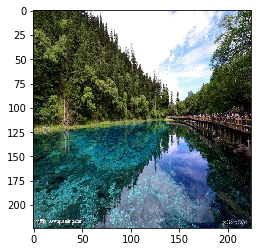

In [27]:
# open an RGB image with size of 224 by 224
img_rgb = Image.open("../test/example_RGB.jpg").resize((224, 224))
img_rgb = np.array(img_rgb)
plt.imshow(img_rgb),img_rgb.shape

## Load RGB image in L, A, B color scale, respectively

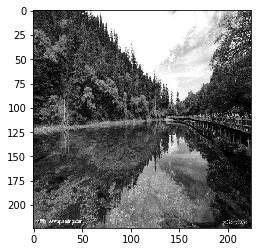

In [28]:
img_gray = np.array(Image.open("../test/example_RGB.jpg").convert('L').resize((224,224)))
plt.imshow(img_gray,cmap = 'gray')

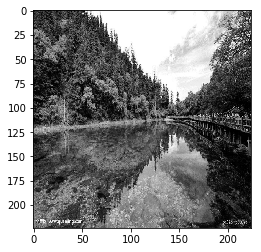

In [29]:
img_lab = color.rgb2lab(img_rgb/255)
img_lab_l = img_lab[:,:,0]
plt.imshow(img_lab_l,cmap = 'gray')

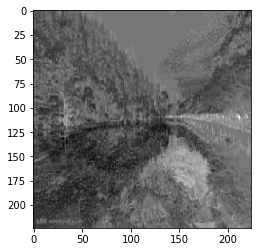

In [30]:
# 'A'
img_lab_a = img_lab[:,:,1]
plt.imshow(img_lab_a,cmap = 'gray') #。demo

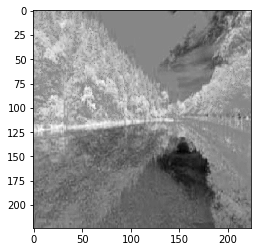

In [31]:
# 'B'
img_lab_b = img_lab[:,:,2]
plt.imshow(img_lab_b,cmap = 'gray') # demo for 

In [32]:
# 4 layers neuron network
class Net(t.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = t.nn.Sequential(
            t.nn.Conv2d(1,16,3,stride=2,padding=1),
            t.nn.BatchNorm2d(16),
            t.nn.ReLU(),
            t.nn.Upsample(scale_factor=2)
        )
        self.conv2 = t.nn.Sequential(
            t.nn.Conv2d(16,32,3,2,1),
            t.nn.BatchNorm2d(32),
            t.nn.ReLU(),
            t.nn.Upsample(scale_factor=2)
        )
        self.conv3 = t.nn.Sequential(
            t.nn.Conv2d(32,16,3,2,1),
            t.nn.BatchNorm2d(16),
            t.nn.ReLU(),
            t.nn.Upsample(scale_factor=2)
        )
        self.conv4 = t.nn.Sequential(
            t.nn.Conv2d(16,2,3,2,1),
            t.nn.BatchNorm2d(2),
            t.nn.ReLU(),
            t.nn.Upsample(scale_factor=2)
        )
        
    def forward(self,x):
        'construct layers'
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return x

In [33]:
img_gray = img_gray[:,:,np.newaxis]
img_lab_l = img_lab_l[:,:,np.newaxis]
img_gray.shape,img_lab_l.shape

((224, 224, 1), (224, 224, 1))

In [34]:
# training samples
x_train = img_lab_l

In [35]:
y_train = img_lab[:,:,1:3]
y_train /= 128
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [36]:
x_train,y_train = transform(x_train),transform(y_train)
x_train,y_train = x_train.float(),y_train.float()
x_train,y_train = x_train.view(-1,1,224,224),y_train.view(-1,2,224,224)

In [37]:
net = Net()
net

TypeError: interpolate() missing 1 required positional argument: 'input'

d:\python\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


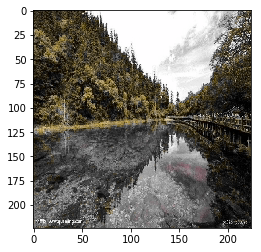

In [18]:
EPOCHS = 500
LR = 0.01
criterion = t.nn.MSELoss()
optimizer = t.optim.Adam(net.parameters(),lr=LR,weight_decay=0.0)
for epoch in tqdm_notebook(range(EPOCHS)):
    index=0
    if epoch % 100 == 0:
        for param_group in optimizer.param_groups:
            LR = LR * 0.9
            param_group['lr'] = LR
    prediction = net.forward(x_train)
    loss = criterion(prediction,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

net.eval()
prediction = net.forward(x_train)
prediction *= 128
prediction = prediction[0].data.numpy()
x_train = x_train[0].data.numpy()
x_train.shape,prediction.shape
result = np.zeros((224,224,3))
result[:,:,0] = x_train[0]
result[:,:,1] = prediction[0]
result[:,:,2] = prediction[1]
result_rgb = color.lab2rgb(result)
plt.imshow(np.array(result_rgb))

In [19]:
loss

tensor(0.0083, grad_fn=<MseLossBackward>)